Small world network testing

In [5]:

import network as nw 
import small_world_network as swn
import numpy as np
import matplotlib.pyplot as plt
import time

1- Setting parameters

In [6]:
L=10#nodes
Z=2#connections to each side
N=L*2 #total connections

2-Creating the network, and checking it's correctness

In [7]:
my_pol_network=swn.SmallWorldNetwork(L,Z)

for n in range(0,my_pol_network.GetL()):
    for z in range(-my_pol_network.GetZ(),+my_pol_network.GetZ()):
        if not z==0:
            assert my_pol_network.network.HasEdge(n,(n+z)%my_pol_network.GetL())


3-Plotting: with increasing randomness $p \in (0,+\infty)$ it shows how connections are rerouted to form shortcuts

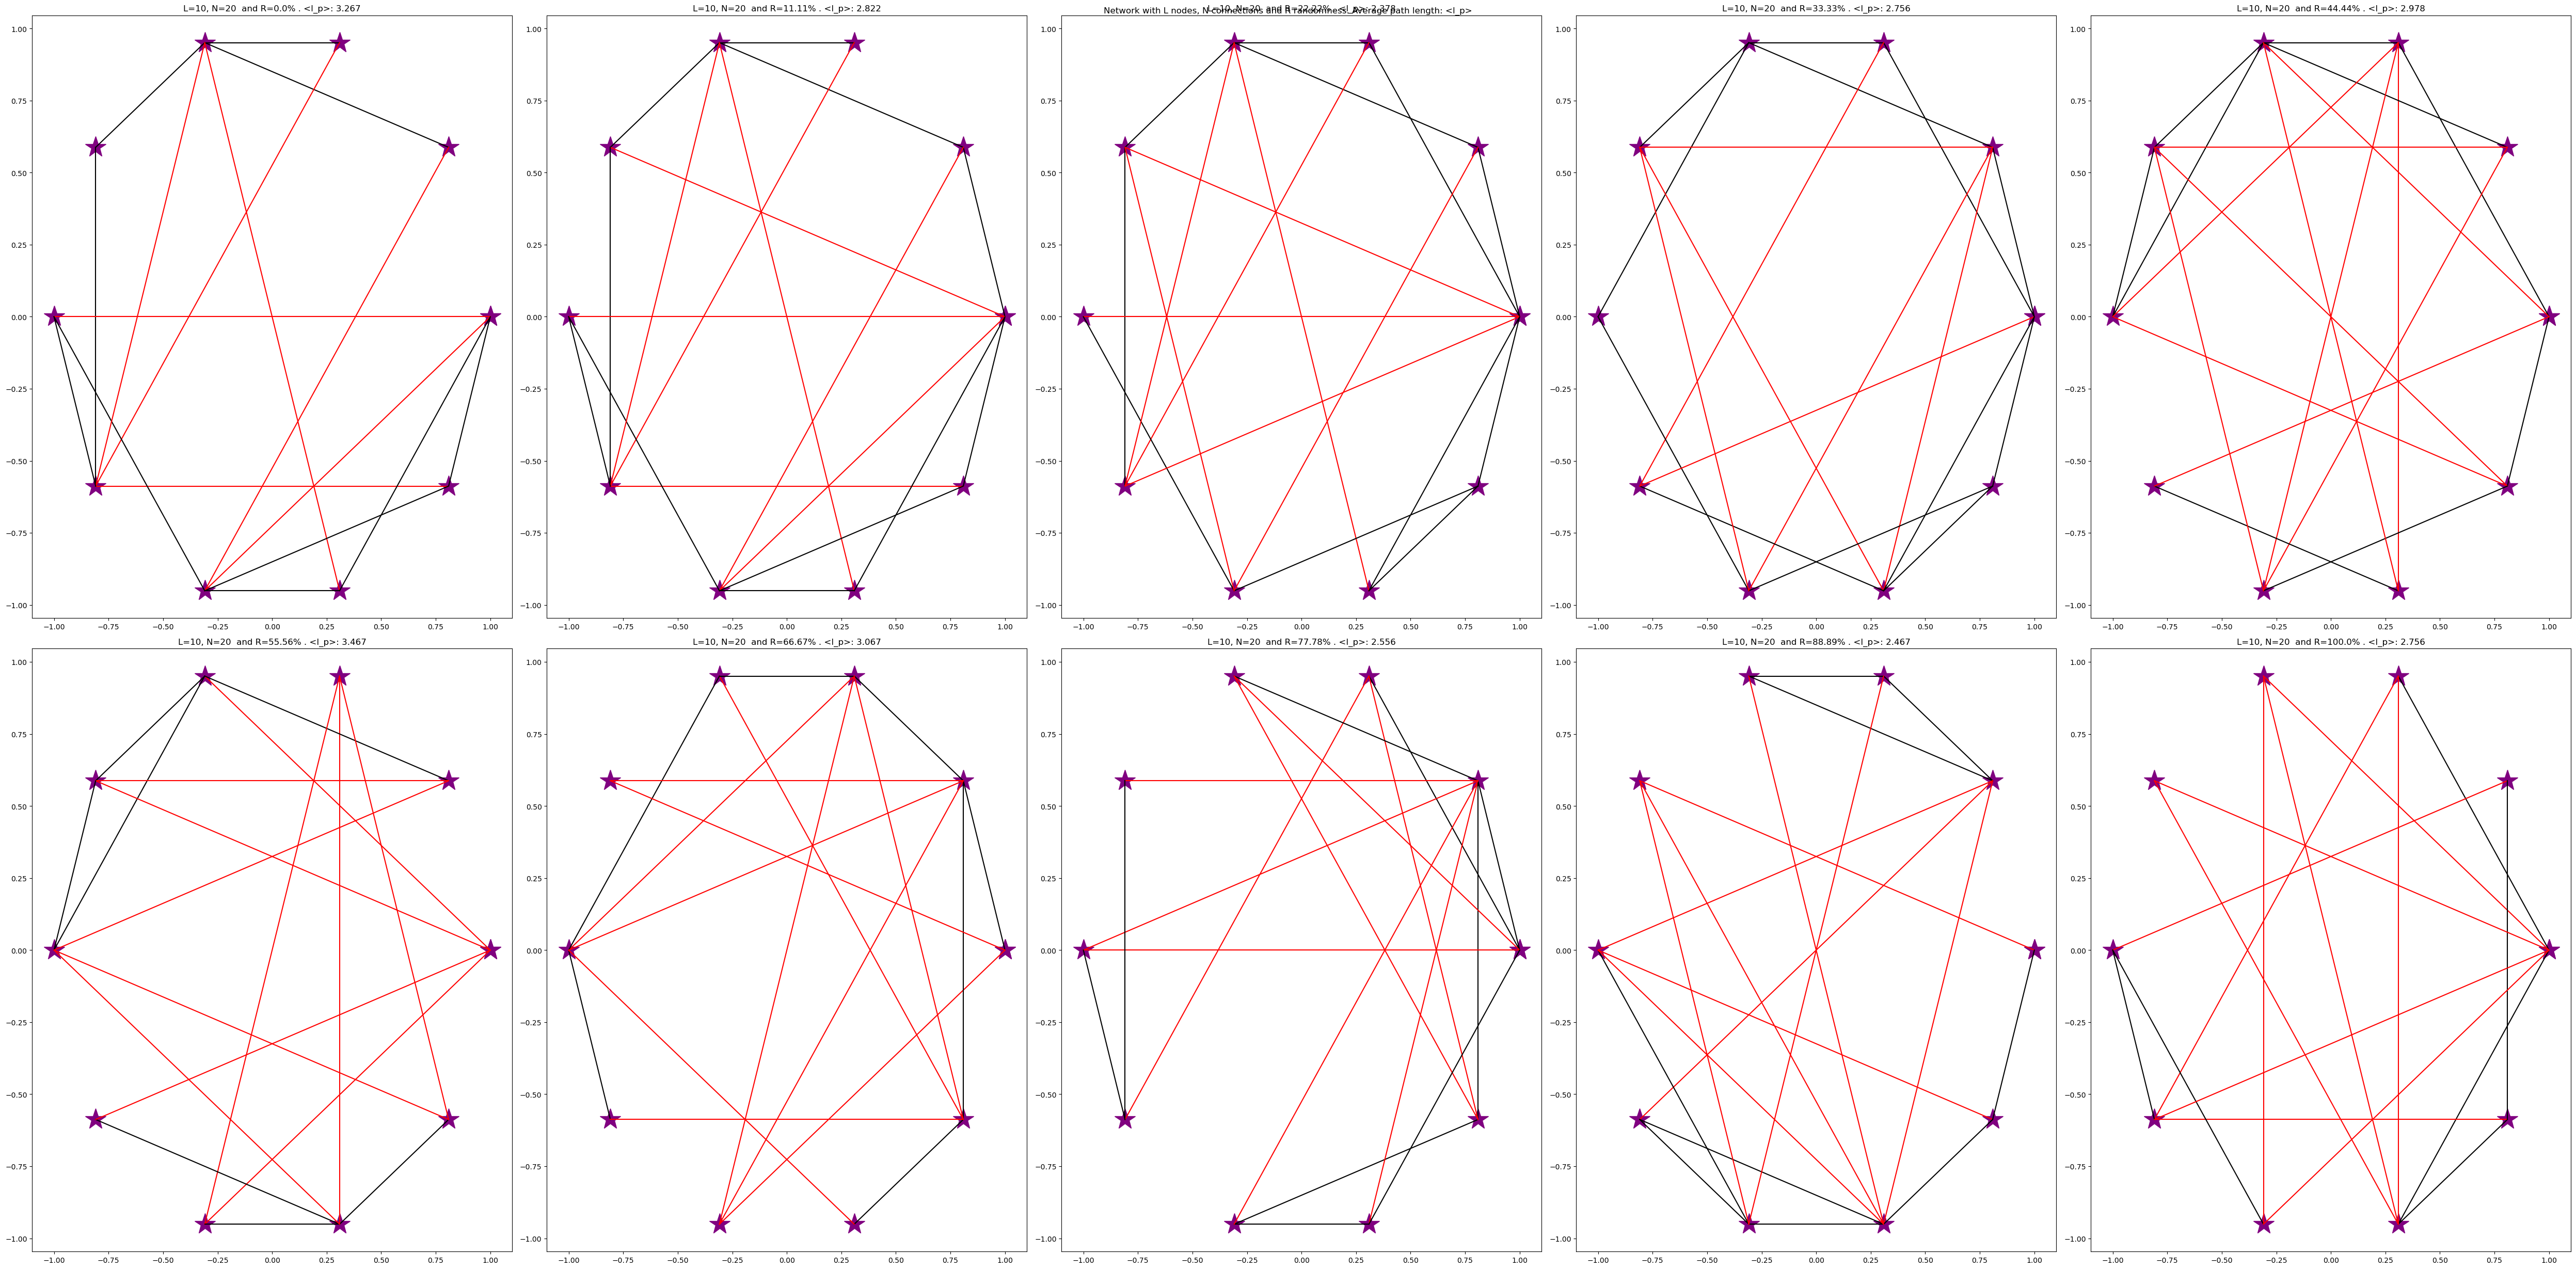

In [ ]:
p_count=10 #how many p values

#plt.ion()

fig,axes=plt.subplots(2,5,figsize=(30,10))

axes=axes.reshape(-1)

for i,p in enumerate(np.linspace(0.,1.,p_count)): 
        my_pol_network.p=p 
        my_pol_network.ReplaceWShortcuts()
        my_pol_network.Draw(axes[i])
        randomness=round(p*100,2)
    
        average_path_lenght=round(my_pol_network.network.FindAveragePathLenght(),3)
        axes[i].set_title(f"L={L}, N={N}  and R={randomness}% . <l_p>: {average_path_lenght}")
        #ax.set_title(f"Network with {L} nodes, {N} connections and {randomness}% randomness. Average path lenght: {average_path_lenght}")
        #fig.canvas.draw()                   # redraw figure
        #fig.canvas.flush_events()           # flush GUI events
        #time.sleep(1)    
plt.suptitle(f"Network with L nodes, N connections and R randomness. Average path length: <l_p>")
plt.tight_layout()

4-Now to the debugging: let's check FindAveragePathLenght() really does what it should. 

[2.9    2.9601 2.9245 2.8201 2.8889 2.7533 2.9822 3.0312 2.9311 2.9777]


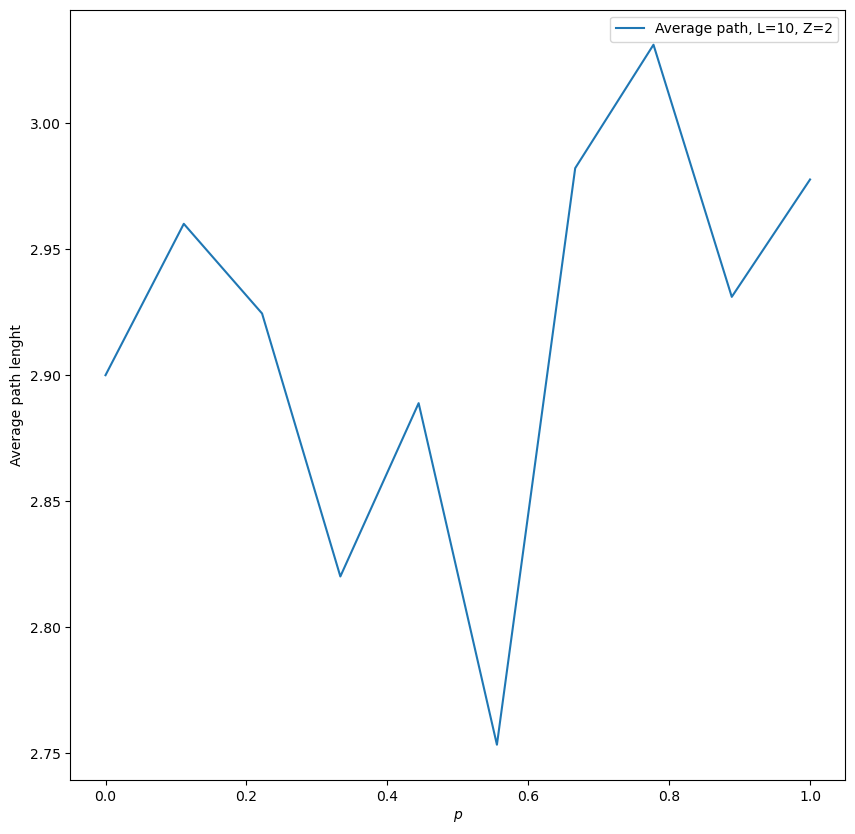

In [ ]:
trials=10 # number of trials for each p value, to be averaged 
p_count=10


fig2,ax2=plt.subplots(1,1,figsize=(10,10))

average_path_lenght=np.empty([trials,p_count])

for t in range(0,trials):
    i=0
    for p in np.linspace(0.,1.,p_count): 
        my_pol_network.p=p 
        my_pol_network.ReplaceWShortcuts()
        randomness=round(p*100,2)
        average_path_lenght[t][i]=round(my_pol_network.network.FindAveragePathLenght(),3)
        i=i+1


#print(average_path_lenght.mean(axis=0))

p=np.linspace(0.,1.,p_count)
mean_path=average_path_lenght.mean(axis=0)
ax2.plot(p,mean_path,label=f"Average path, L={L}, Z={Z}")
ax2.set_xlabel("$p$")
ax2.set_ylabel("Average path lenght")
ax2.legend()



plt.show()

4-Plotting varius L togheter

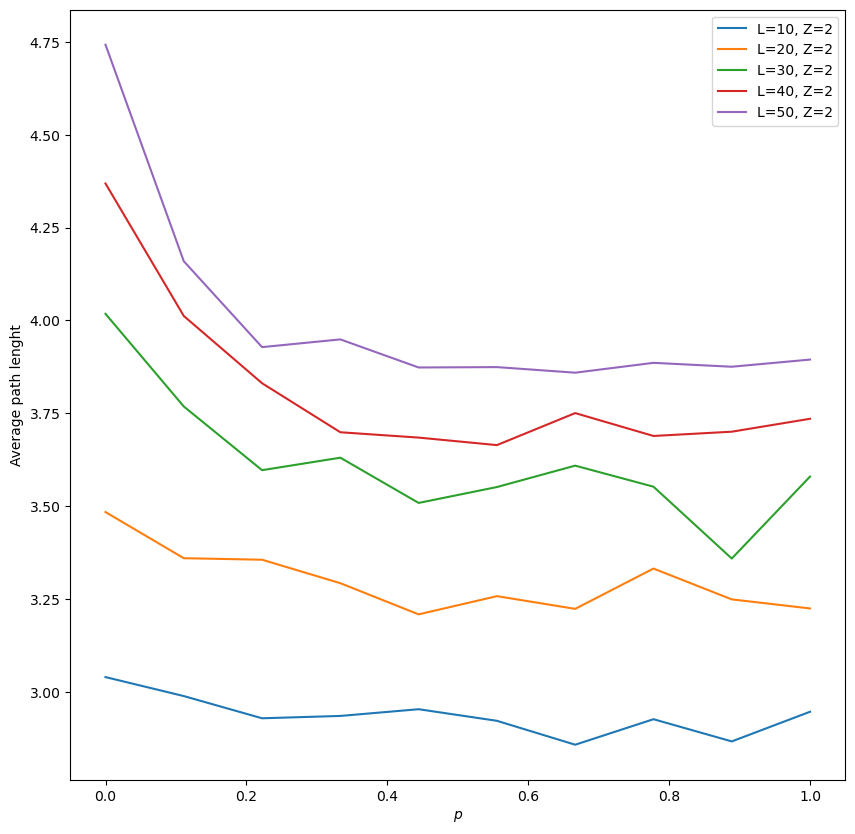

In [24]:
trials=10 # number of trials for each p value, to be averaged 
p_count=10


fig2,ax2=plt.subplots(1,1,figsize=(10,10))

average_path_lenght=np.empty([trials,p_count])

p_arr=np.linspace(0.,1.,p_count)


for L in [10,20,30,40,50]: 
        my_pol_network=swn.SmallWorldNetwork(L,Z)
        for t in range(0,trials):
            i=0
            for p in p_arr: 
                my_pol_network.p=p 
                my_pol_network.ReplaceWShortcuts()
                randomness=round(p*100,2)
                average_path_lenght[t][i]=round(my_pol_network.network.FindAveragePathLenght(),3)
                i=i+1
        mean_path=average_path_lenght.mean(axis=0)
        ax2.plot(p_arr,mean_path,label=f"L={L}, Z={Z}")
                




ax2.set_xlabel("$p$")
ax2.set_ylabel("Average path lenght")
ax2.legend()



plt.show()